In [320]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import requests
import pickle

In [321]:
edgelist = pd.read_pickle('bot/edgelist_2_edges_from_start_2928556470.pkl')

edgelist.head()

,originating_id,receiving_id,originating_following_count,originating_follower_count,receiving_following_count,receiving_follower_count
5,753358756725993472,2928556470,687,202,NaN,NaN
7,789015869154131969,2928556470,573,319,NaN,NaN
11,2219182135,2928556470,699,583,NaN,NaN
12,1138633154,2928556470,985,861,NaN,NaN
14,790958232462200832,2928556470,390,18,NaN,NaN


In [322]:
edgelist = edgelist[['originating_id', 'receiving_id']]

In [323]:
# Convert id from string to int
edgelist.originating_id= edgelist.originating_id.astype(int) #.loc[edgelist.receiving_id == '844779426260791296']
edgelist.receiving_id = edgelist.receiving_id.astype(int)

In [324]:
G = nx.convert_matrix.from_pandas_edgelist(edgelist, 'originating_id', 'receiving_id', 
                                       create_using=nx.DiGraph())
nodelist = list(G.nodes)

In [325]:
# read in our label dataset and create list of all bots in gilani dataset
path = 'data/gilani-2017/gilani-2017.tsv'
df = pd.read_csv(path, sep='\t', header=None).rename(columns={0: "twitter_id", 1: 'label'})
bots = list(df.loc[df.label == 'bot', 'twitter_id'])  

# Create list of labels for bot (1) or human (0)
# if twitter id not in gilani dataset we assign it human label
node_labels = []
for node in nodelist:
    if node in bots:
        node_labels.append(1)
    else:
        node_labels.append(0)

In [326]:
# number of bots in this network
sum(node_labels)

1

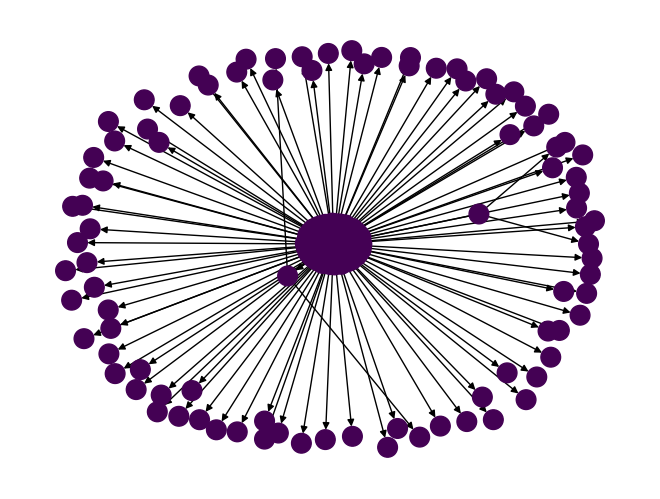

In [327]:
nx.draw_spring(G, node_color=node_labels, node_size=200)
#nx.draw_random(G, node_color=node_labels, node_size=200)

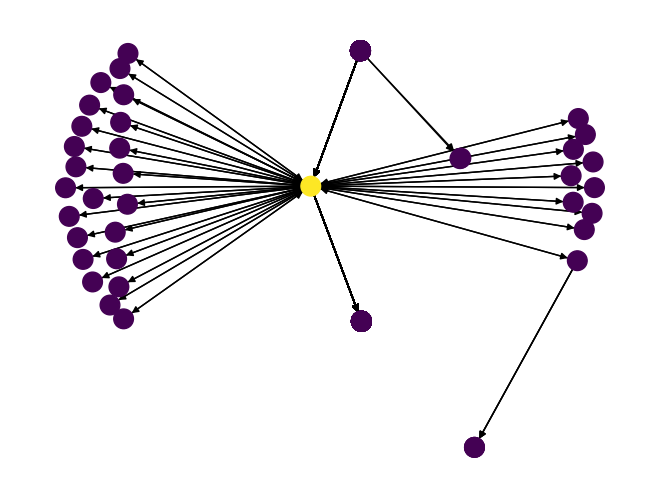

In [328]:
nx.draw_kamada_kawai(G, node_color=node_labels, node_size=200)

In [308]:
nx.algorithms.reciprocity(G)

0.2796610169491525